In [15]:
%run preamble.ipynb

# Load data

In [6]:
bits = np.load("data/singlefiwepoch14600_step496400Bits.npy")

In [7]:
ICIs = pd.read_hdf("data/singlefiwepoch14600_step496400.hdf5")

In [8]:
clicks = np.load("data/singlefiwepoch14600_step496400Clicks.npy")

In [9]:
tsAll = np.load("data/singlefiwepoch14600_step496400Ts.npy")

In [10]:
Zs = np.load("data/singlefiwepoch14600_step496400Zs.npy")

# ATE

**Avg nClick**

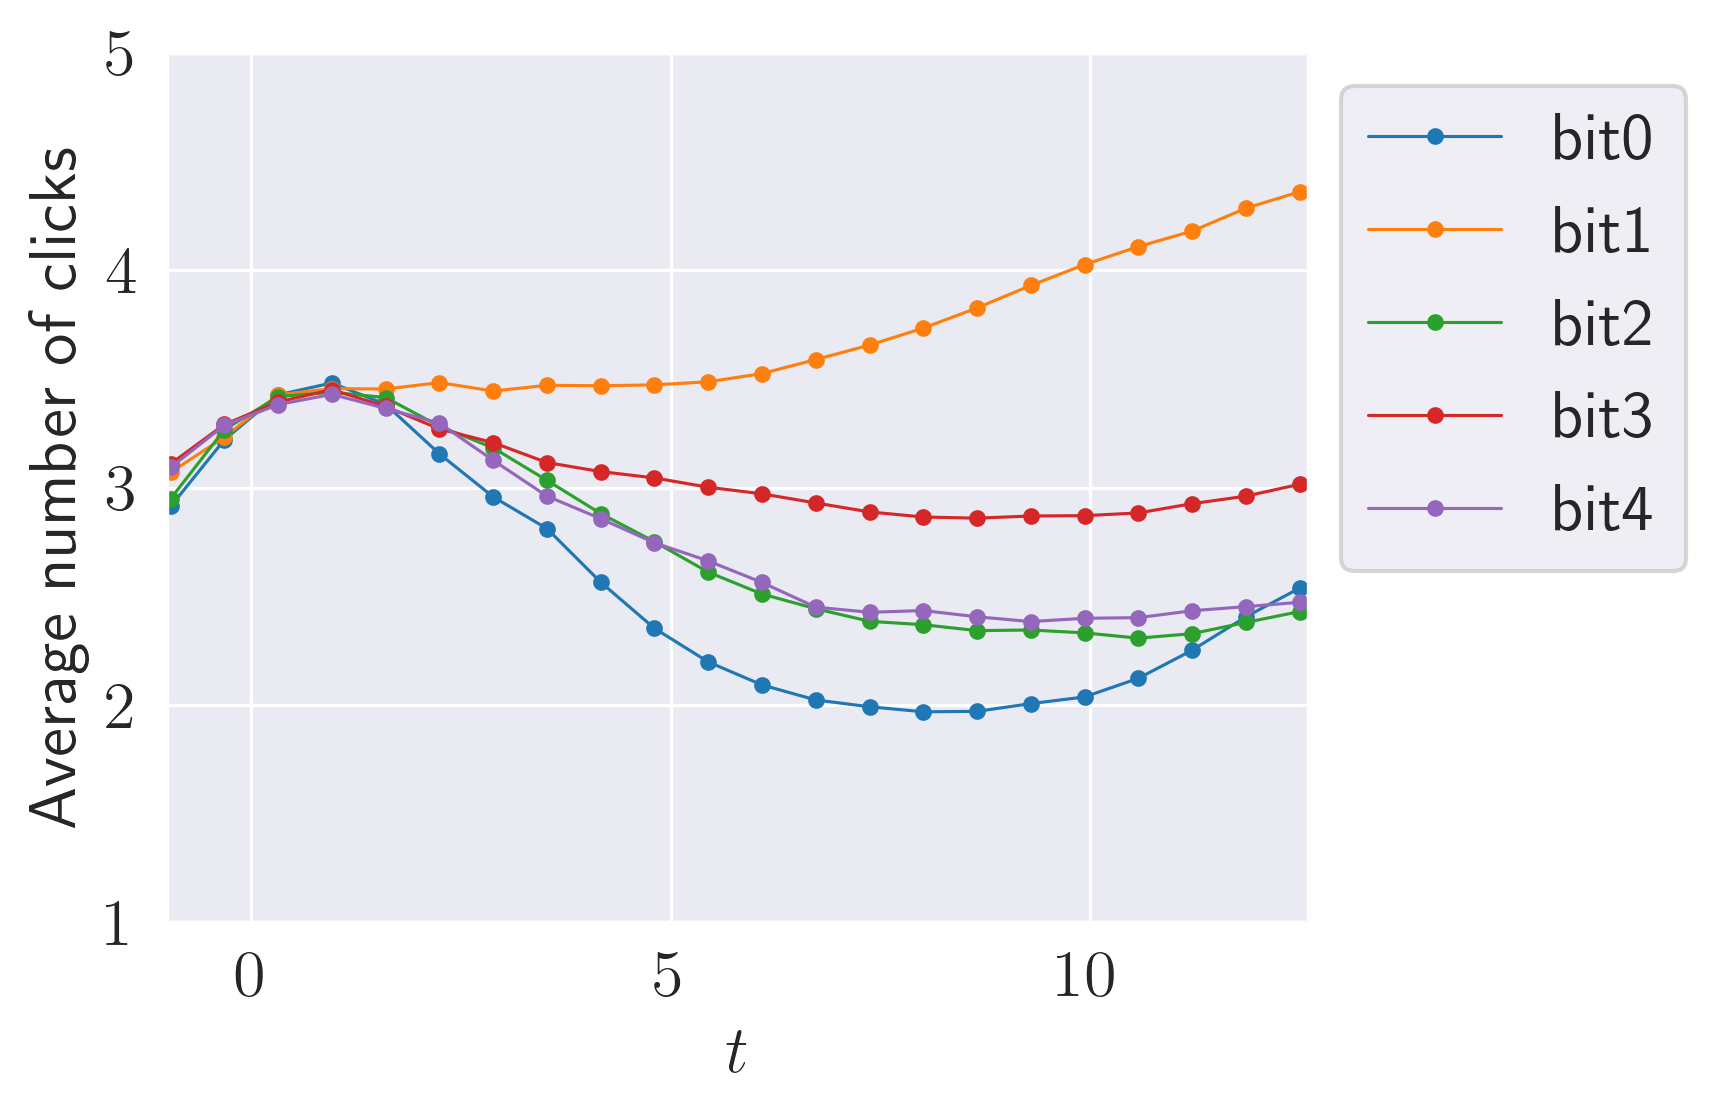

In [23]:
bInd = 18
baseline = clicks[1:, bInd, :].mean()

plt.plot(tsAll[bInd:], clicks[1, bInd:, :].mean(axis=1), label="bit0", marker=".");
plt.plot(tsAll[bInd:], clicks[2, bInd:, :].mean(axis=1), label="bit1", marker=".");
plt.plot(tsAll[bInd:], clicks[3, bInd:, :].mean(axis=1), label="bit2", marker=".");
plt.plot(tsAll[bInd:], clicks[4, bInd:, :].mean(axis=1), label="bit3", marker=".");
plt.plot(tsAll[bInd:], clicks[5, bInd:, :].mean(axis=1), label="bit4", marker=".");

plt.xlabel(r"$t$");
plt.ylabel(r"Average number of clicks");

plt.ylim(1, 5);
plt.xlim(-1, 12.6);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout();


**ATE - 0 as the baseline**

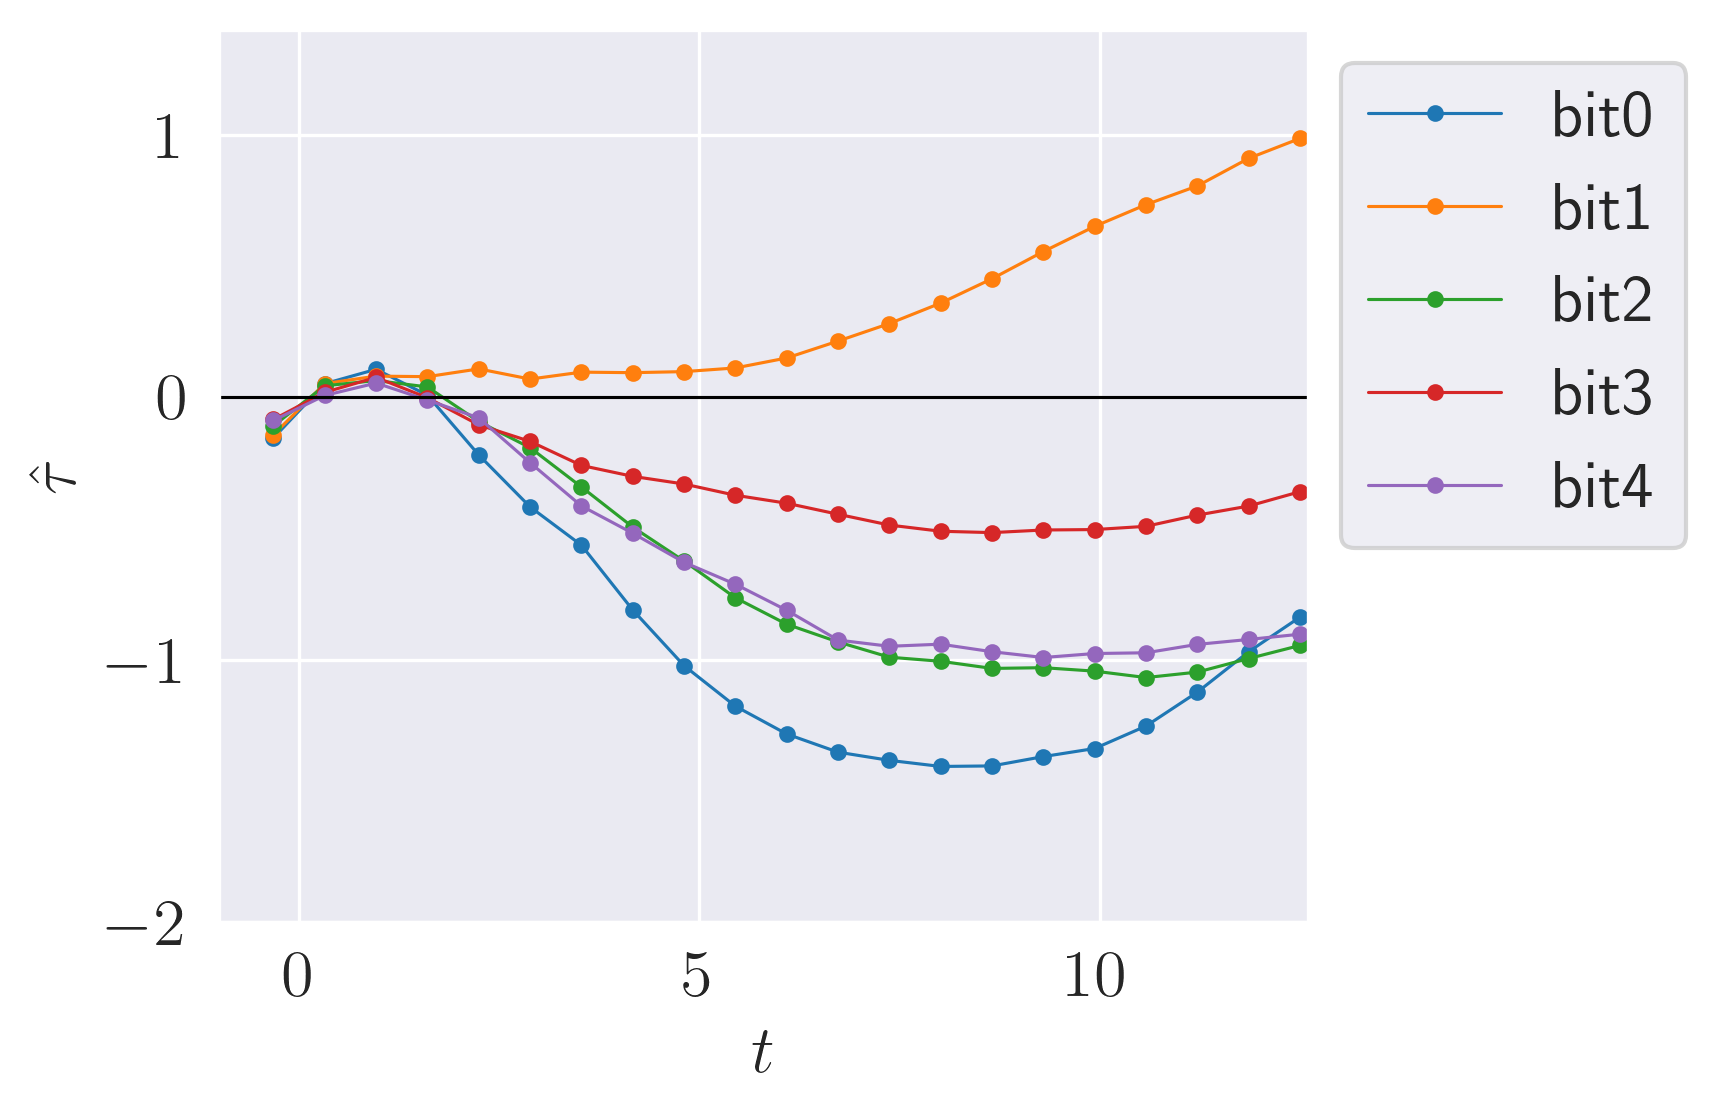

In [25]:
plt.plot(tsAll[19:], clicks[1, 19:, :].mean(axis=1) - clicks[0, 0].mean(), label="bit0", marker=".");
plt.plot(tsAll[19:], clicks[2, 19:, :].mean(axis=1) - clicks[0, 0].mean(), label="bit1", marker=".");
plt.plot(tsAll[19:], clicks[3, 19:, :].mean(axis=1) - clicks[0, 0].mean(), label="bit2", marker=".");
plt.plot(tsAll[19:], clicks[4, 19:, :].mean(axis=1) - clicks[0, 0].mean(), label="bit3", marker=".");
plt.plot(tsAll[19:], clicks[5, 19:, :].mean(axis=1) - clicks[0, 0].mean(), label="bit4", marker=".");

# average at the meeting point
plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}$");

plt.ylim(-2, 1.4);
plt.xlim(-1, 12.6);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()


**baseline -1**

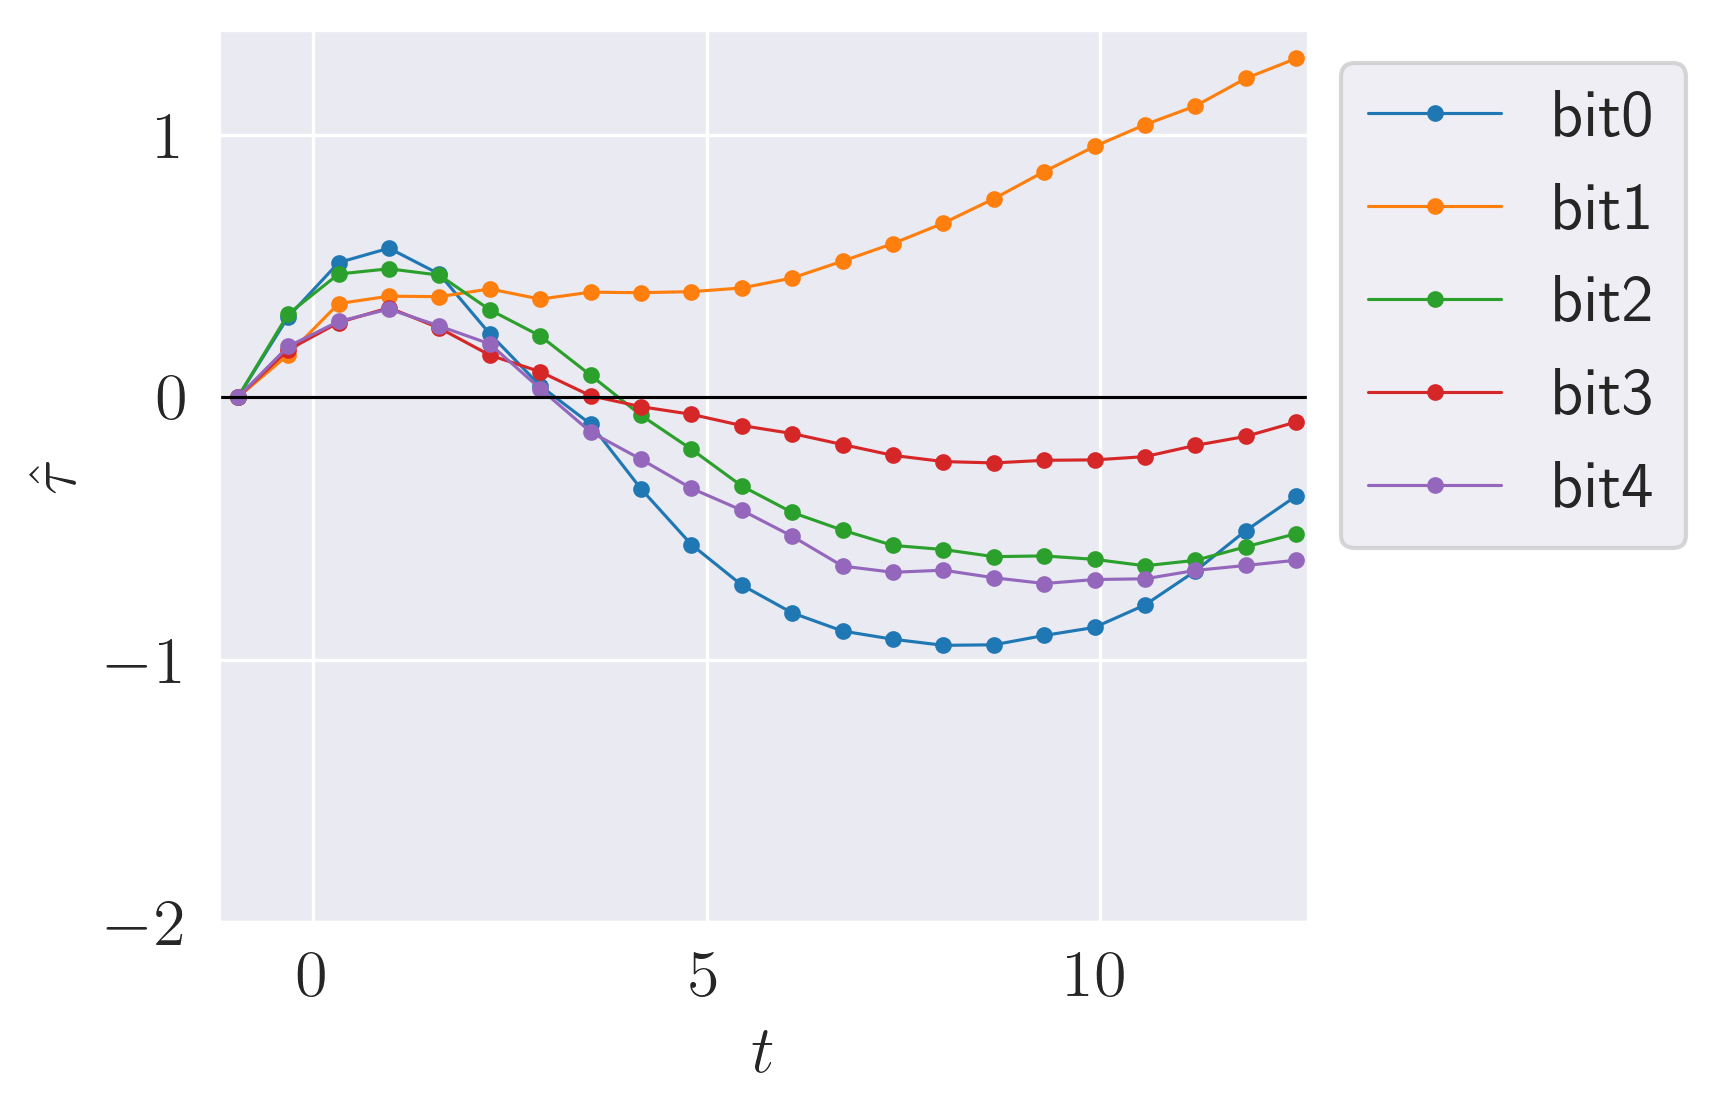

In [26]:
bInd = 18

plt.plot(tsAll[bInd:], clicks[1, bInd:, :].mean(axis=1) - clicks[1, bInd, :].mean(), label="bit0", marker=".");
plt.plot(tsAll[bInd:], clicks[2, bInd:, :].mean(axis=1) - clicks[2, bInd, :].mean(), label="bit1", marker=".");
plt.plot(tsAll[bInd:], clicks[3, bInd:, :].mean(axis=1) - clicks[3, bInd, :].mean(), label="bit2", marker=".");
plt.plot(tsAll[bInd:], clicks[4, bInd:, :].mean(axis=1) - clicks[4, bInd, :].mean(), label="bit3", marker=".");
plt.plot(tsAll[bInd:], clicks[5, bInd:, :].mean(axis=1) - clicks[5, bInd, :].mean(), label="bit4", marker=".");

# average at the meeting point
plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}$");

plt.ylim(-2, 1.4);
plt.xlim(-1.2, 12.65);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()



**baseline +1**

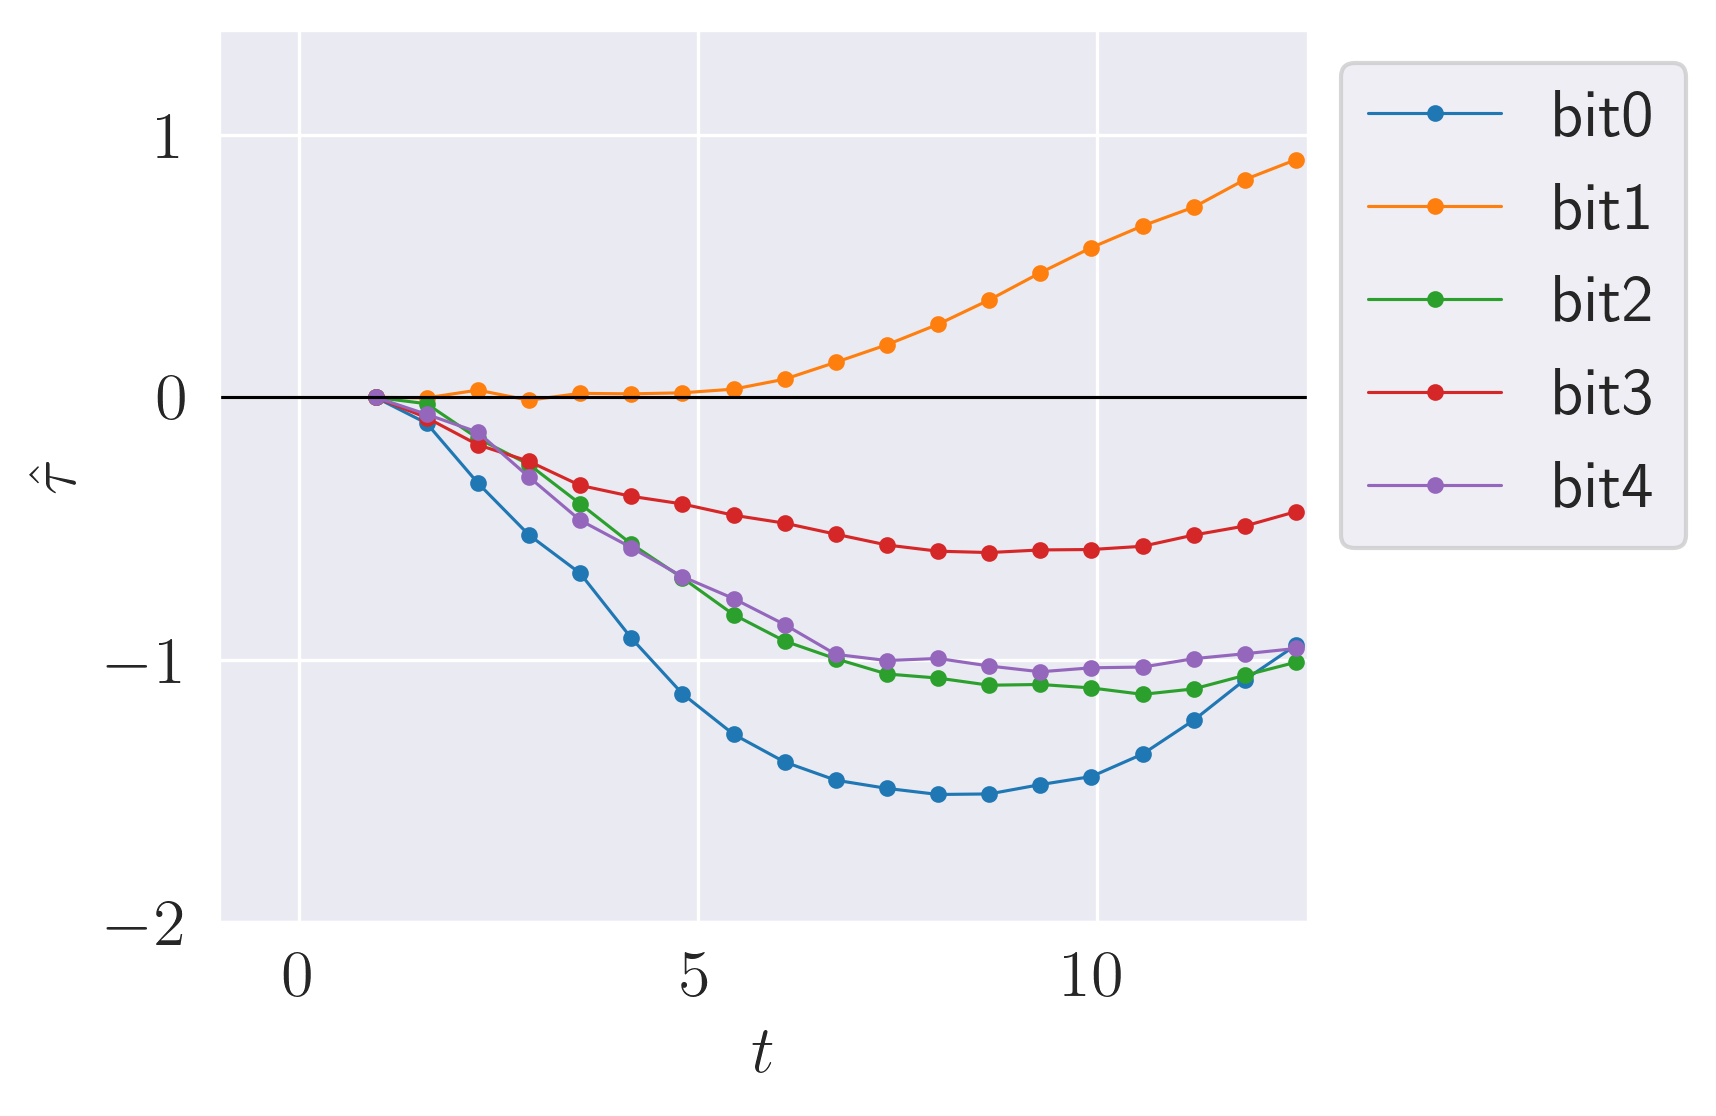

In [27]:
bInd = 21

plt.plot(tsAll[bInd:], clicks[1, bInd:, :].mean(axis=1) - clicks[1, bInd, :].mean(), label="bit0", marker=".");
plt.plot(tsAll[bInd:], clicks[2, bInd:, :].mean(axis=1) - clicks[2, bInd, :].mean(), label="bit1", marker=".");
plt.plot(tsAll[bInd:], clicks[3, bInd:, :].mean(axis=1) - clicks[3, bInd, :].mean(), label="bit2", marker=".");
plt.plot(tsAll[bInd:], clicks[4, bInd:, :].mean(axis=1) - clicks[4, bInd, :].mean(), label="bit3", marker=".");
plt.plot(tsAll[bInd:], clicks[5, bInd:, :].mean(axis=1) - clicks[5, bInd, :].mean(), label="bit4", marker=".");

# average at the meeting point
plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}$");

plt.ylim(-2, 1.4);
plt.xlim(-1, 12.65);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()


### ATE of the STD

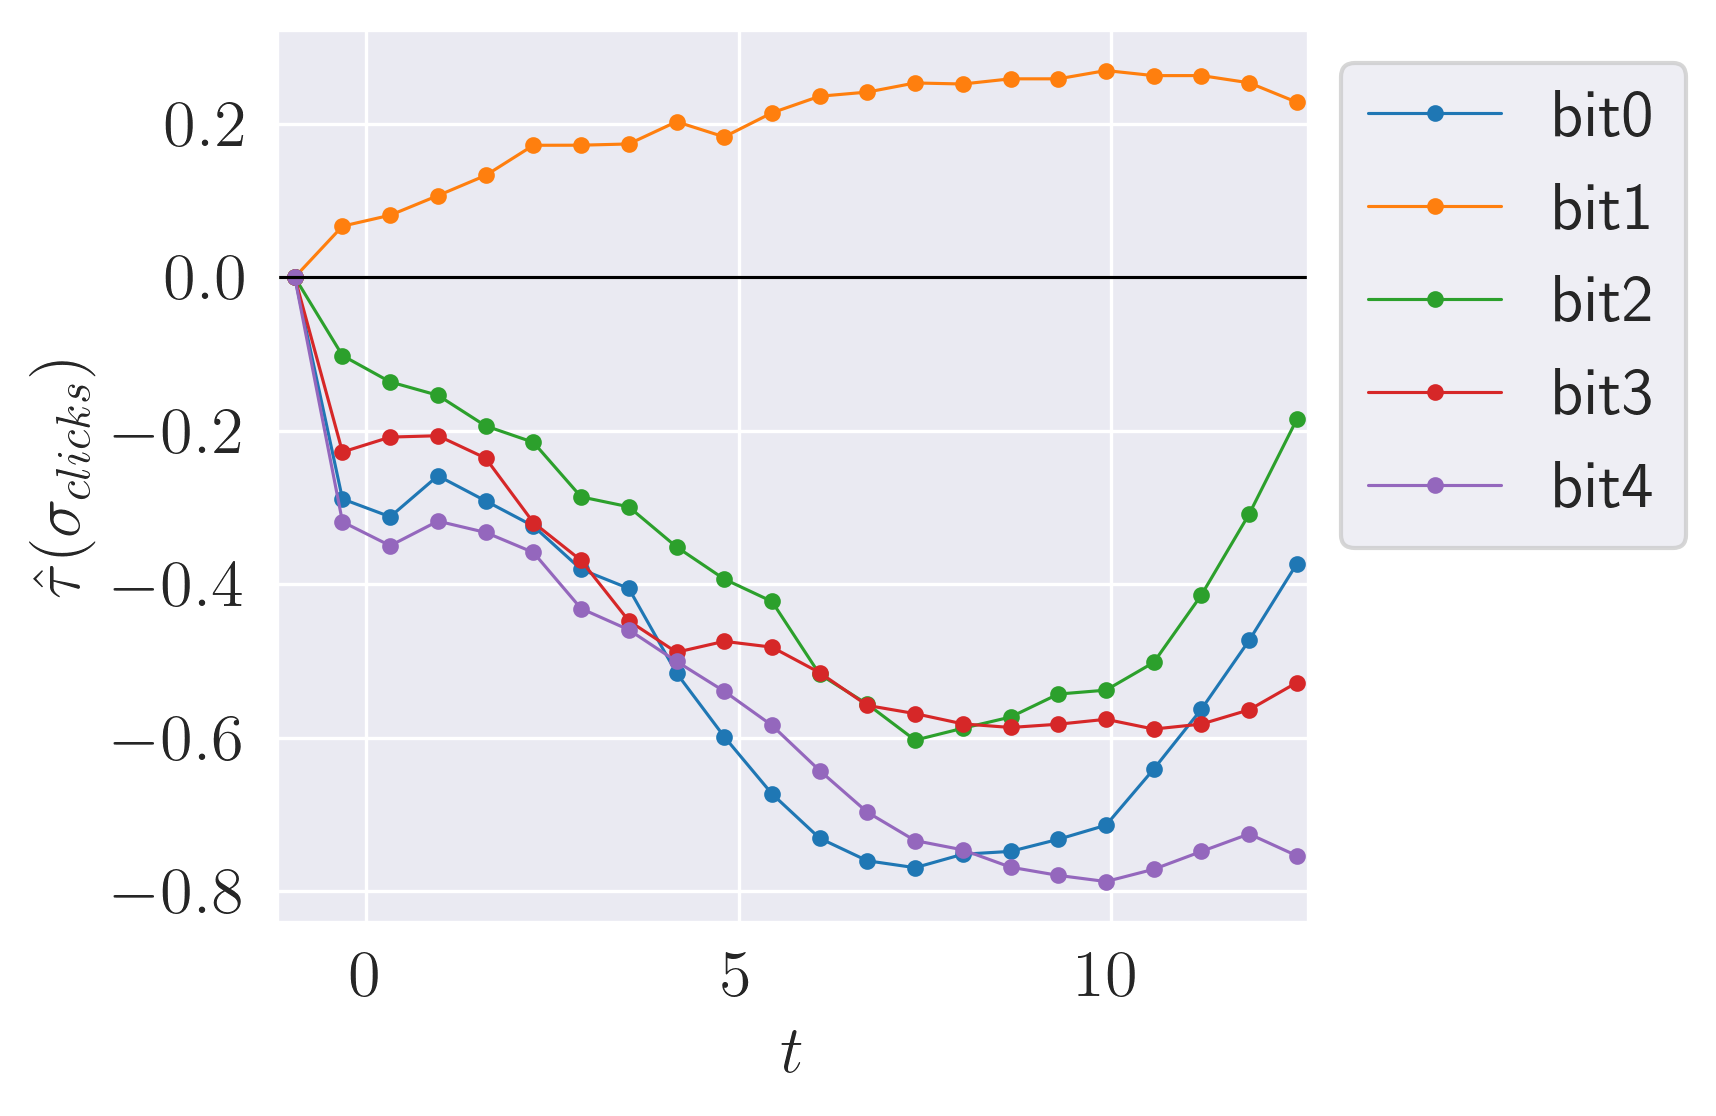

In [28]:
bInd = 18

plt.plot(tsAll[bInd:], clicks[1, bInd:, :].std(axis=1) - clicks[1, bInd, :].std(), label="bit0", marker=".")
plt.plot(tsAll[bInd:], clicks[2, bInd:, :].std(axis=1) - clicks[2, bInd, :].std(), label="bit1", marker=".")
plt.plot(tsAll[bInd:], clicks[3, bInd:, :].std(axis=1) - clicks[3, bInd, :].std(), label="bit2", marker=".")
plt.plot(tsAll[bInd:], clicks[4, bInd:, :].std(axis=1) - clicks[4, bInd, :].std(), label="bit3", marker=".")
plt.plot(tsAll[bInd:], clicks[5, bInd:, :].std(axis=1) - clicks[5, bInd, :].std(), label="bit4", marker=".")

plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}(\sigma_{clicks})$");

# plt.ylim(1, 2);
# plt.xlim(-1, 12.5);
plt.xlim(-1.2, 12.65);

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.tight_layout()



# Incremental Causal effect

## The expected effect of an infinitesimal increase in the treatment

**-1 baseline**

In [29]:
bInd = 18

In [30]:
round((np.diff(clicks[1, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.028

In [31]:
round((np.diff(clicks[2, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

0.096

In [32]:
round((np.diff(clicks[3, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.039

In [33]:
round((np.diff(clicks[4, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.007

In [34]:
round((np.diff(clicks[5, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.046

**+1 baseline**

In [35]:
bInd = 21

In [36]:
round((np.diff(clicks[1, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.082

In [37]:
round((np.diff(clicks[2, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

0.079

In [38]:
round((np.diff(clicks[3, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.087

In [39]:
round((np.diff(clicks[4, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.038

In [40]:
round((np.diff(clicks[5, bInd:, :], axis=0)
       / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))).mean(axis=1).mean(), 3)

-0.083

### Expectation of the derivative plot

**-1 baseline**

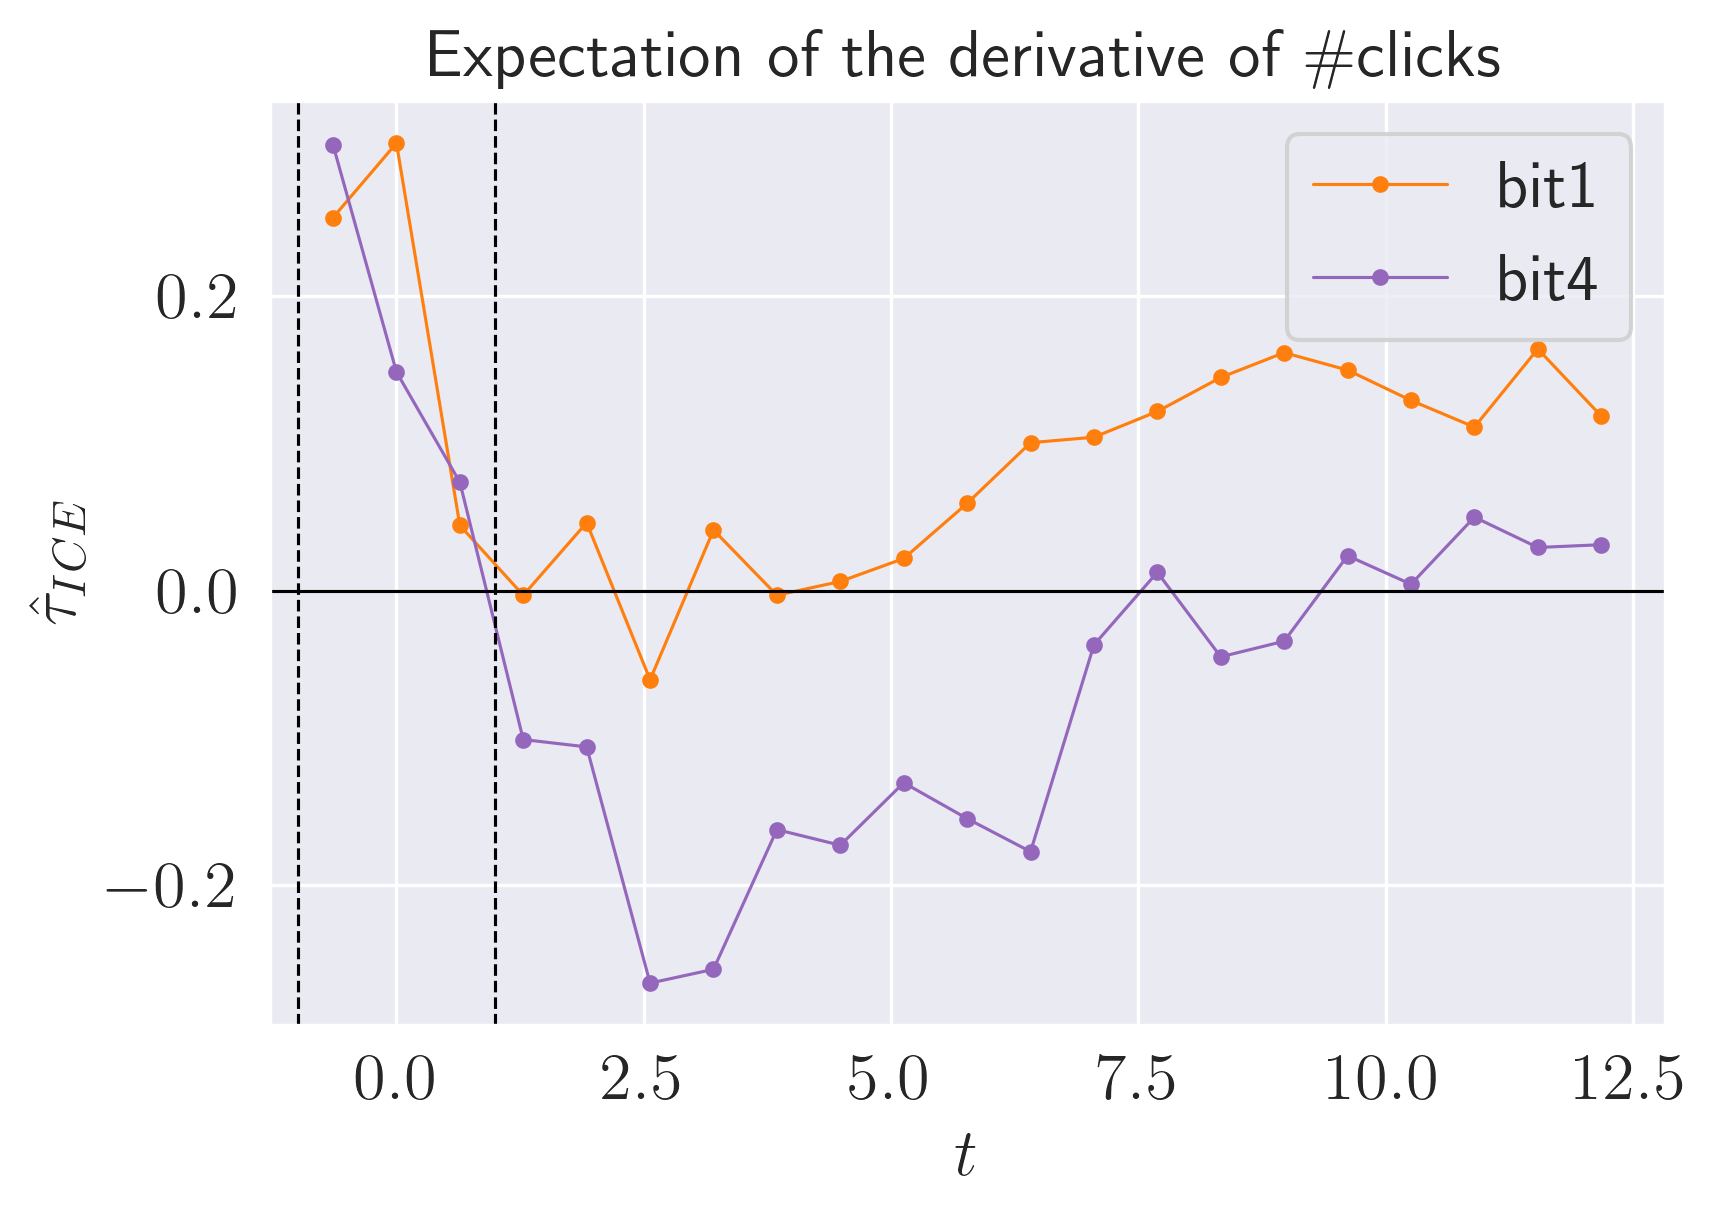

In [41]:
bInd = 18

plt.plot((tsAll[bInd:-1] + tsAll[(bInd + 1):]) / 2,
         (np.diff(clicks[2, bInd:, :], axis=0) / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))
          ).mean(axis=1), label="bit1", marker=".", color="C1"
         )

plt.plot((tsAll[bInd:-1] + tsAll[(bInd + 1):]) / 2,
         (np.diff(clicks[5, bInd:, :], axis=0) / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))
          ).mean(axis=1), label="bit4", marker=".", color="C4"
         )

plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}_{ICE}$");

plt.axvline(-1, ls="--", color="k")
plt.axvline(1, ls="--", color="k")

plt.legend(loc="best", bbox_to_anchor=(1, 1));
plt.title(r"Expectation of the derivative of \#clicks");

**+1 baseline**

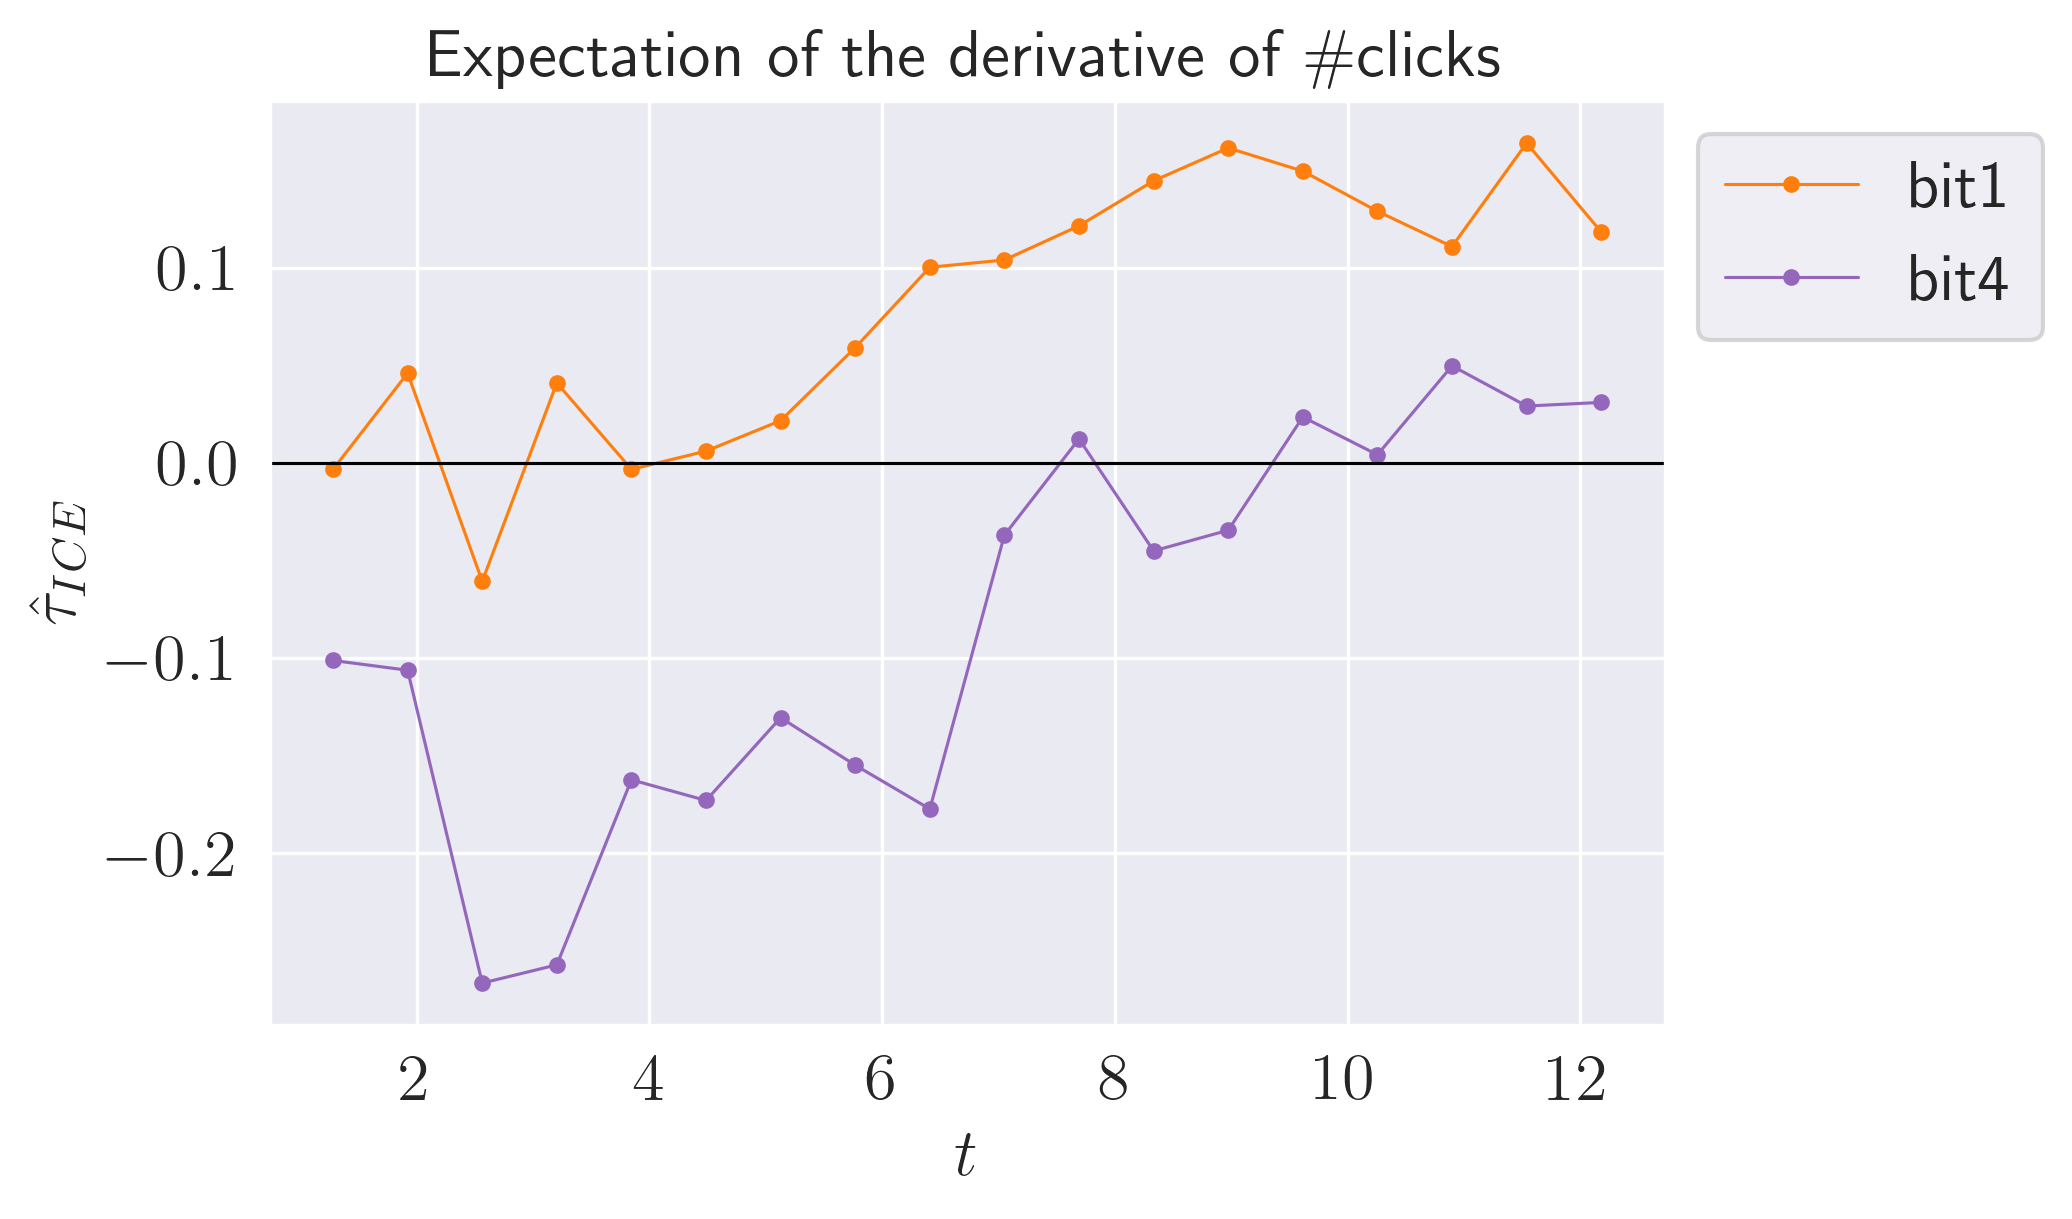

In [42]:
bInd = 21

plt.plot((tsAll[bInd:-1] + tsAll[(bInd + 1):]) / 2,
         (np.diff(clicks[2, bInd:, :], axis=0) / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))
          ).mean(axis=1), label="bit1", marker=".", color="C1"
         )

plt.plot((tsAll[bInd:-1] + tsAll[(bInd + 1):]) / 2,
         (np.diff(clicks[5, bInd:, :], axis=0) / ((tsAll[-1] - tsAll[bInd]) / (len(tsAll[bInd:]) - 1))
          ).mean(axis=1), label="bit4", marker=".", color="C4"
         )

plt.axhline(0, c='k');

plt.xlabel(r"$t$");
plt.ylabel(r"$\hat{\tau}_{ICE}$");

plt.title(r"Expectation of the derivative of \#clicks");
plt.legend(loc="best", bbox_to_anchor=(1, 1));
